<a href="https://colab.research.google.com/github/Atul245/Computer_vision-mnit/blob/main/Image_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Image Preprocessing

Image preprocessing is the process of manipulating raw image data into a usable and meaningful format. It allows you to eliminate unwanted distortions and enhance specific qualities essential for computer vision applications. Preprocessing is a crucial first step to prepare your image data before feeding it into machine learning models.

In [25]:
import cv2

In [26]:
image = cv2.imread('/ema.jpg')

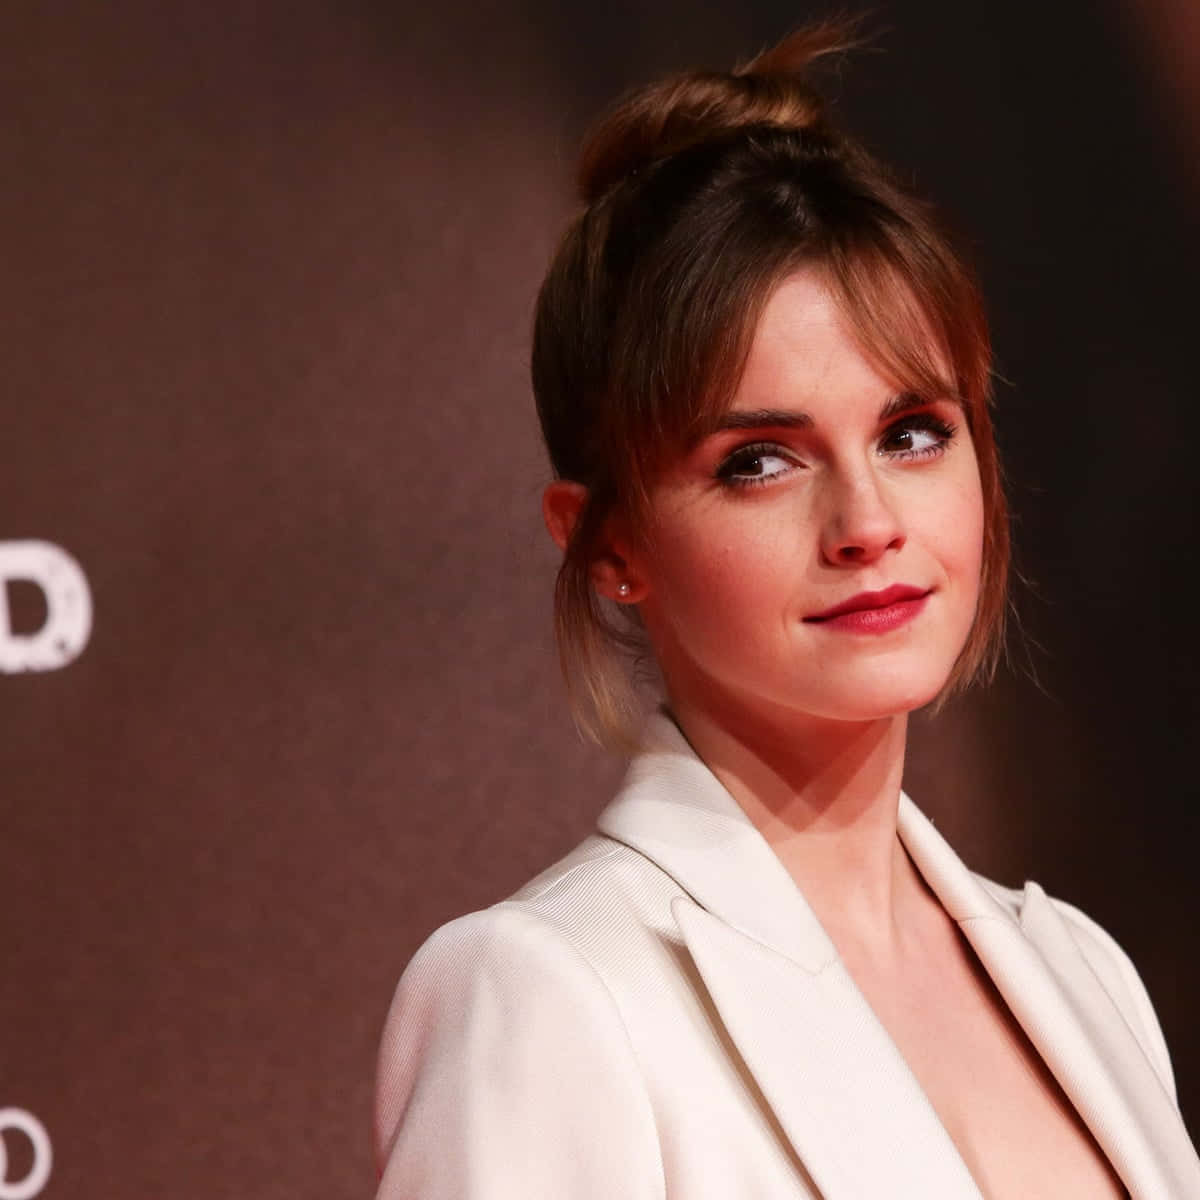

In [27]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

# Resizing and Cropping Images

Resizing images to a uniform size is important for machine learning algorithms to function properly. We can use OpenCV’s resize() method to resize images.

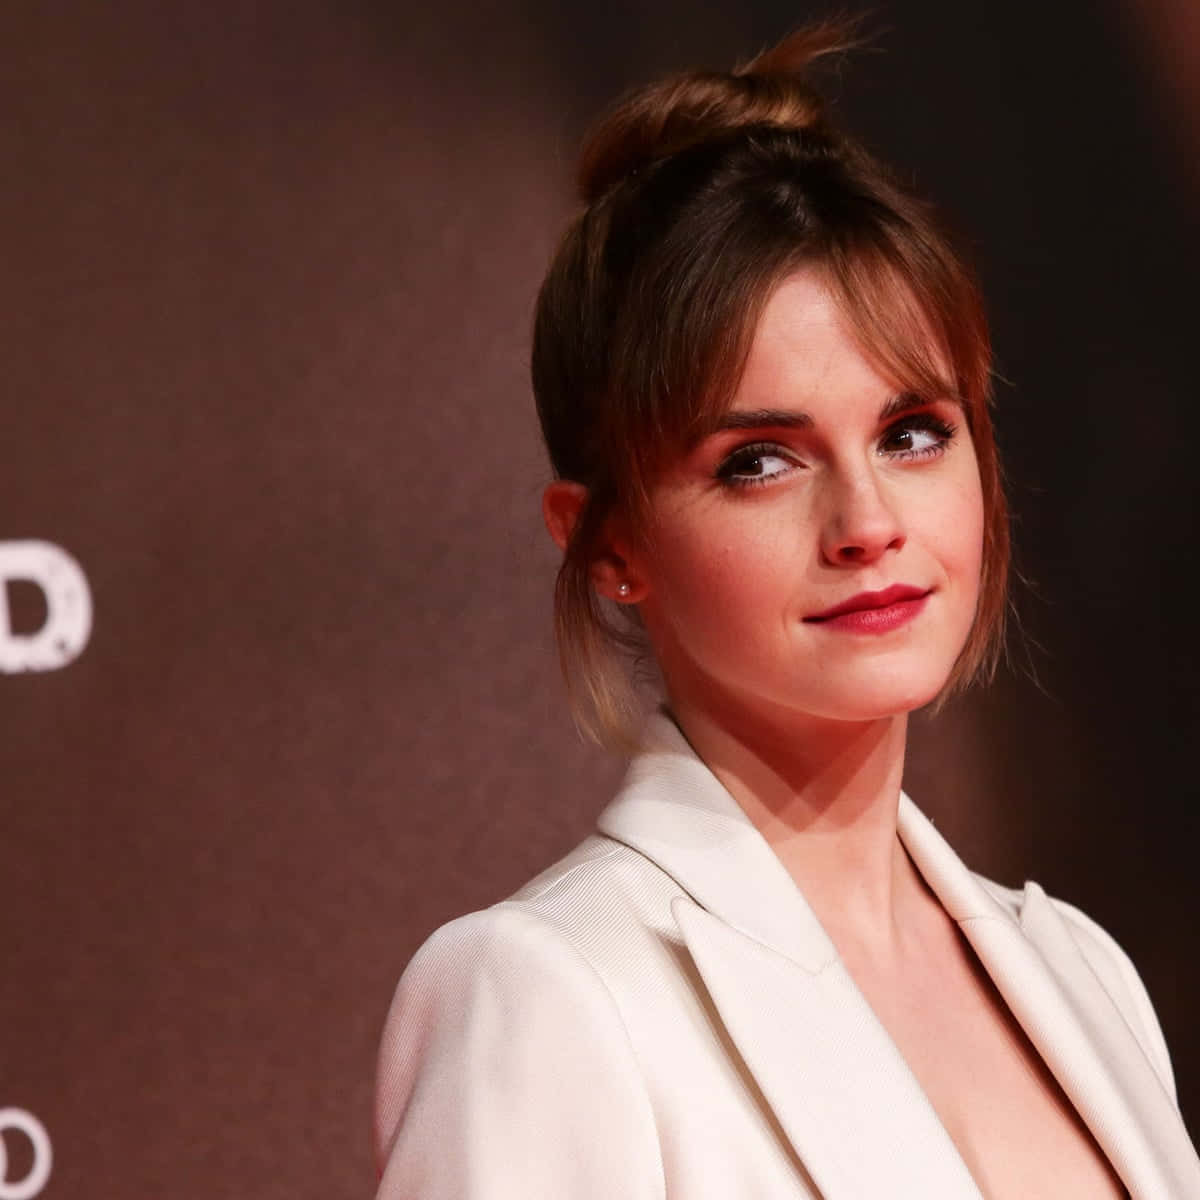

In [28]:
resized = cv2.resize(image, (320,320))
cv2_imshow(image)

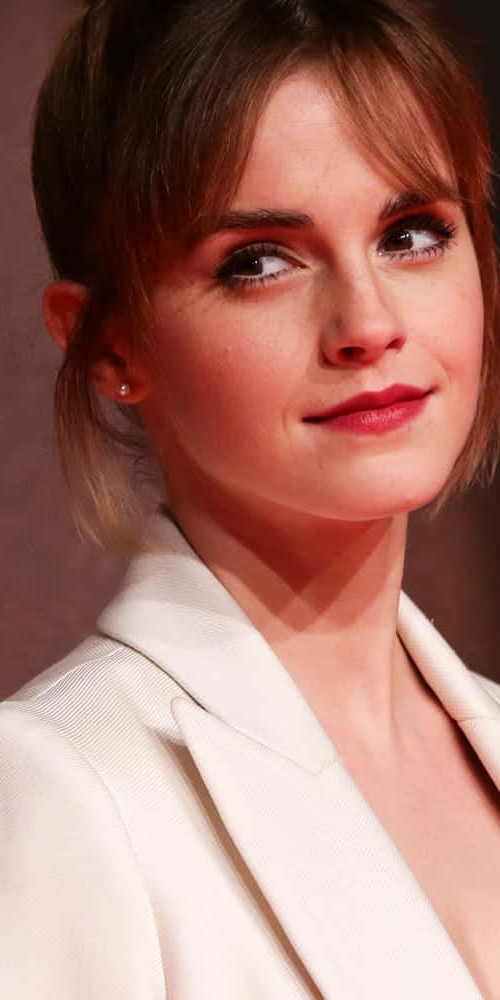

In [40]:
target_h , target_w = 1000 , 500
start_x , start_y = 500, 200

crop_img = image[start_y : start_y + target_h, start_x : start_x + target_w]
cv2_imshow(crop_img)

# Converting between color spaces

Converting color images to grayscale can simplify your image data and reduce computational needs for some algorithms. The cvtColor() method can be used to convert RGB to grayscale.

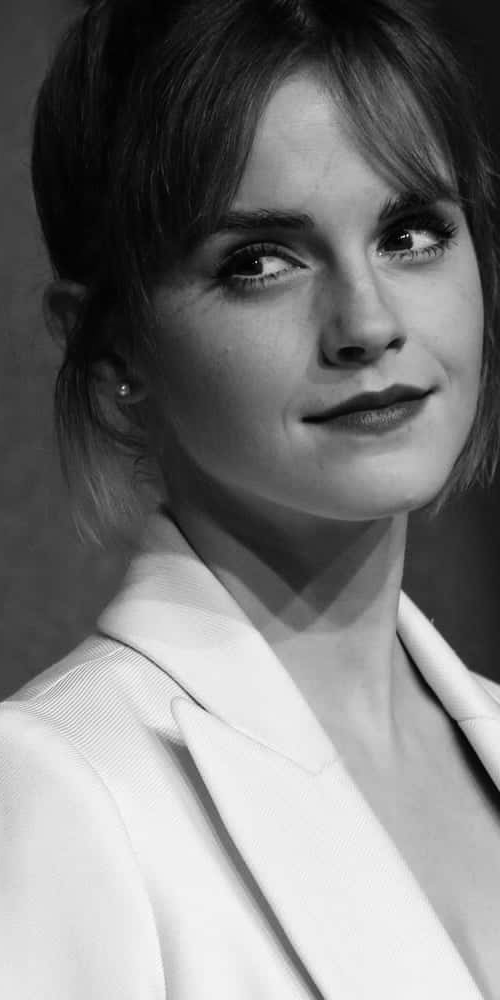

Values at Pixel (250, 500)
GRAY:  63


In [67]:
gray_img = cv2.cvtColor (crop_img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_img)

cx, cy = target_w // 2, target_h // 2
print(f"Values at Pixel ({cx}, {cy})")
print(f"GRAY:  {gray_img[cy, cx]}")

In [70]:
print(gray_img)

[[ 52  52  52 ...  19  19  19]
 [ 52  52  52 ...  19  19  19]
 [ 52  52  52 ...  19  19  19]
 ...
 [230 230 230 ... 199 199 198]
 [230 230 230 ... 198 197 197]
 [230 230 230 ... 197 197 196]]


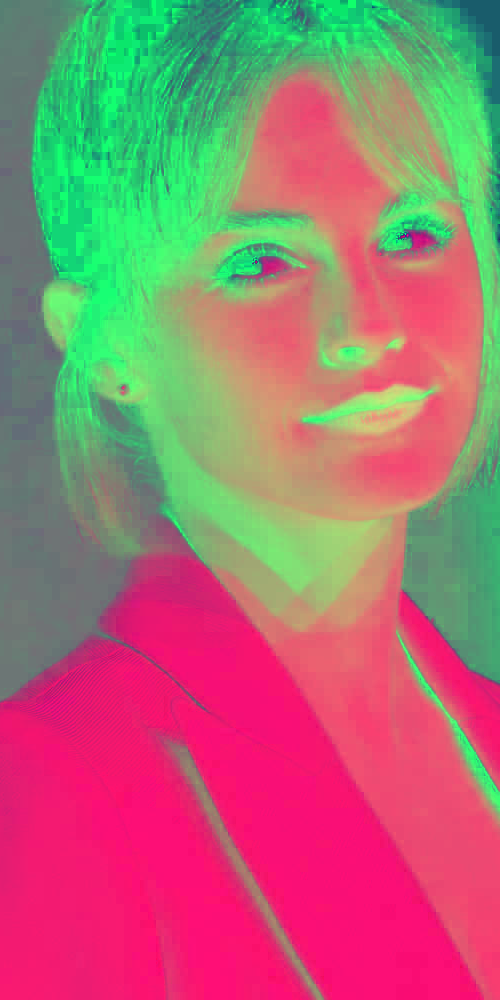

Values at Pixel (250, 500)
HSV:  [116 187 154]


In [68]:
# RGB TO HSV

hsv_img = cv2.cvtColor (crop_img, cv2.COLOR_RGB2HSV)
cv2_imshow(hsv_img)

cx, cy = target_w // 2, target_h // 2
print(f"Values at Pixel ({cx}, {cy})")
print(f"HSV:  {hsv_img[cy, cx]}")

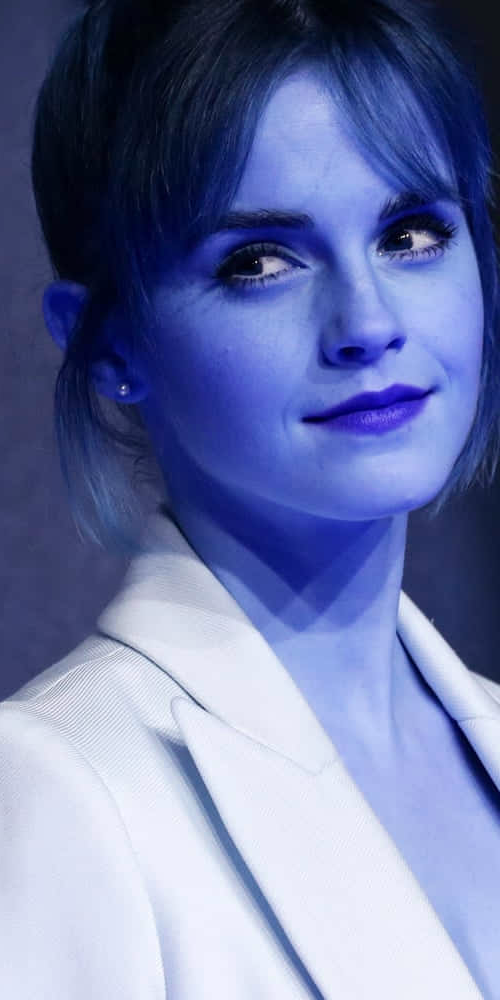

Values at Pixel (250, 500)
RGB:  [154  57  41]


In [52]:
rgb_img = cv2.cvtColor (crop_img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_img)

cx, cy = target_w // 2, target_h // 2
print(f"Values at Pixel ({cx}, {cy})")
print(f"RGB:  {rgb_img[cy, cx]}")

# Normalising Pixel Values for Consistent Brightness

Normalization adjusts the intensity values of pixels to a desired range, often between 0 to 1. This can improve the performance of machine learning models. Normalize () from scikit-image can be used for this.
Two techniques:


1.   **Rescaling Pixel Values:** Rescaling the pixel values to range from 0 to 1. This is done by dividing all pixels by the maximum pixel value (typically 255 for RGB images).
2.   **Histogram Equalization:** This spreads out pixel intensities over the whole range to improve contrast.



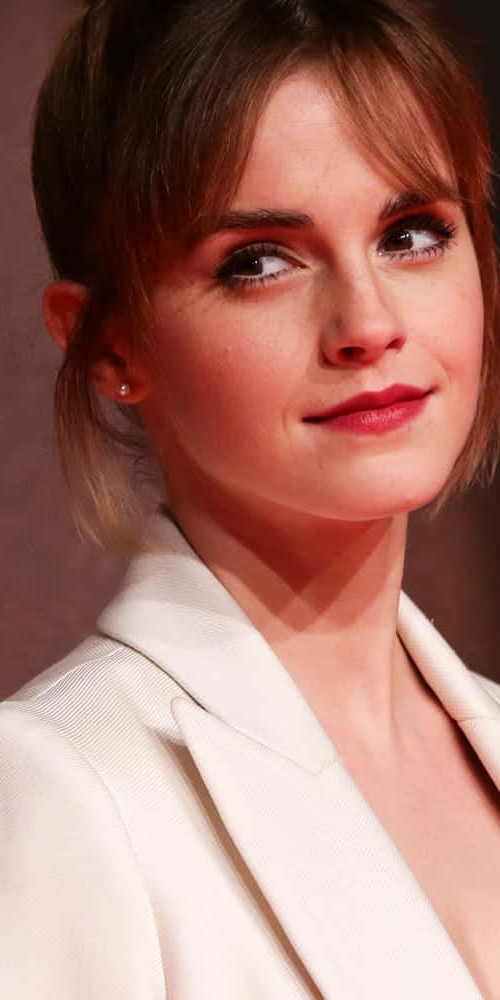

In [66]:
# Rescaling pixel values
normalized_img = crop_img / 255.0

# Convert back to 0-255 range and cast to unsigned int for display
display_img = (normalized_img * 255).astype('uint8')
cv2_imshow(display_img)

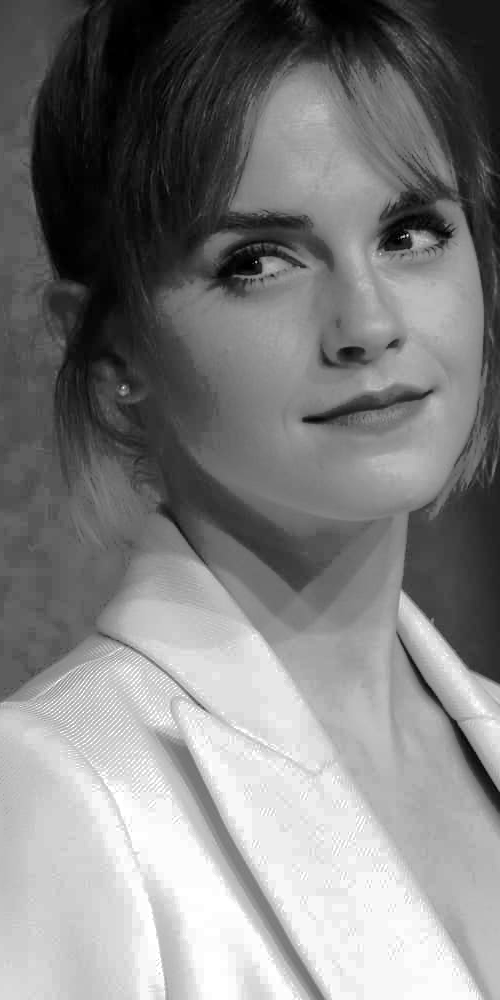

In [61]:
eq_img = cv2.equalizeHist(gray_img)
cv2_imshow(eq_img)

# TRANSFORMATIONS

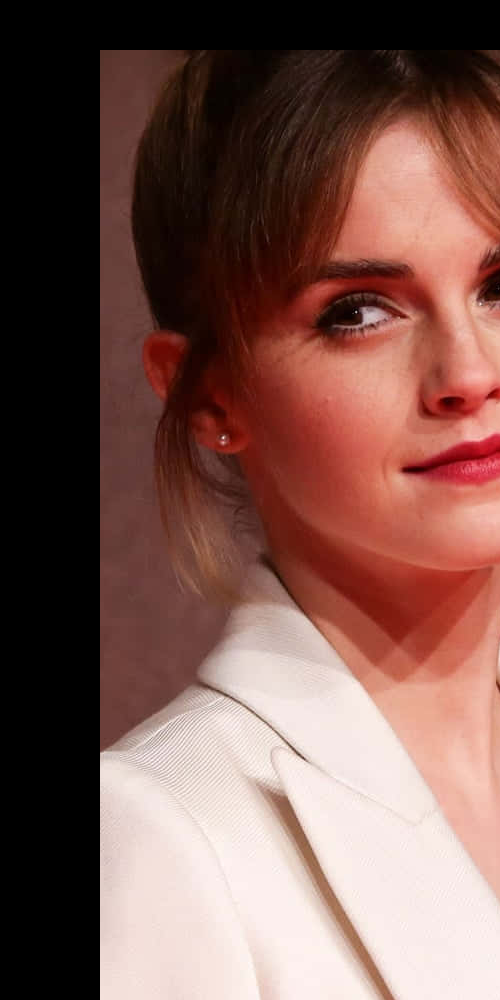

In [77]:
# Transalation (shifting)

import numpy as np

matrix_shift = np.float32([[1, 0, 100], [0, 1, 50]])  # Matrix format: [[1, 0, shift_x], [0, 1, shift_y]]
shifted_img = cv2.warpAffine(crop_img, matrix_shift, (target_w, target_h))

cv2_imshow(shifted_img)

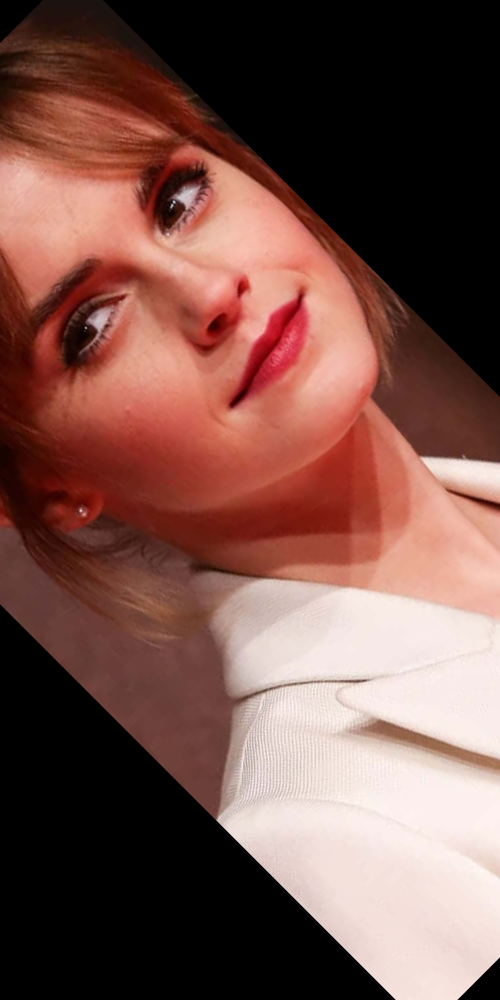

In [79]:
# Rotation (Spinning)

center = (cx, cy)

matrix_rotate = cv2.getRotationMatrix2D(center, 45, 1.0) #Create the rotation instructions (Center, Angle=45, Scale=1.0)
rotated_img = cv2.warpAffine(crop_img, matrix_rotate, (target_w, target_h))

cv2_imshow(rotated_img)

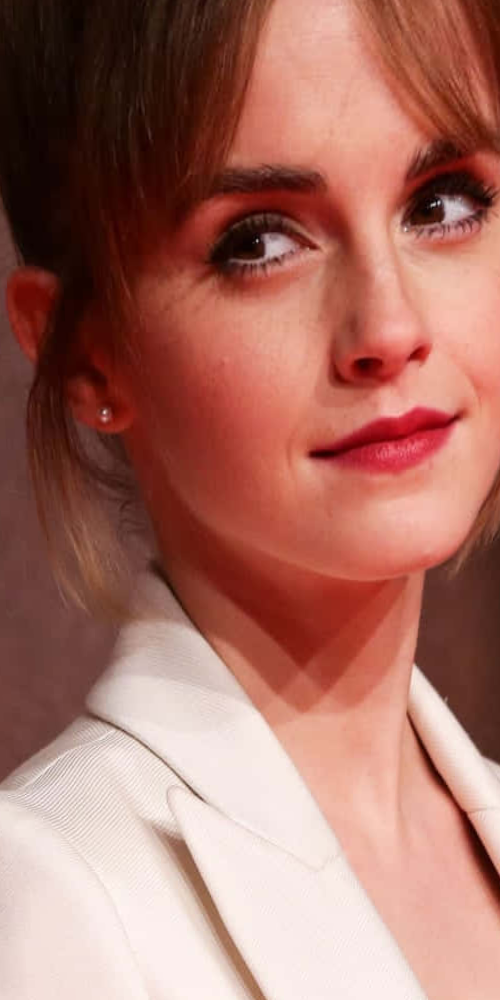

In [82]:
# Perspective Transform (Straightening a Trapezoid)

h_crop, w_crop, _ = rotated_img.shape

# Define 4 points on the rotated image
pts1_new = np.float32([
    [w_crop * 0.1, h_crop * 0.1],
    [w_crop * 0.9, h_crop * 0.1],
    [w_crop * 0.0, h_crop * 0.9],
    [w_crop * 1.0, h_crop * 0.9]
])

# Define 4 points for the transformed image
pts2_new = np.float32([
    [0, 0],
    [w_crop, 0],
    [0, h_crop],
    [w_crop, h_crop]
])


matrix_perspective_new = cv2.getPerspectiveTransform(pts1_new, pts2_new)
warped_img = cv2.warpPerspective(crop_img, matrix_perspective_new, (w_crop, h_crop))

cv2_imshow(warped_img)
